In [938]:
import math
import random
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import operator
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np

In [860]:
iris = load_iris()

In [838]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [949]:
def loadLeafData(fname):
    targetClass = []
    data = []
    with open(fname,"r") as f:
        lines = f.read().splitlines()
        for line in lines:
            tokens = line.split(",")
            targetClass.append(int(tokens[0]))
            specData = [float(token) for i, token in enumerate(tokens[1:])]
            data.append(specData)
    
    combine = list(zip(data,targetClass))
    random.shuffle(combine)
    data, targetClass = zip(*combine)
    return data, targetClass
#d,t = loadLeafData("leaf.data")
#print(d[0],t[0])

In [910]:
def kFoldCrossValidation(data, target, k, setIndex):
    """
        K=5 Fold Cross Validation. Divide data  to 5 part and
        return i th part of data
    """
    totalData = len(data) 
    setSize = int(totalData/k)

    startIndex = setSize*setIndex
    endIndex = int(startIndex + setSize)
    #print("TestData StartI:",startIndex,"\nTestData EndIndex:",endIndex)
    
    testSet = [list(d) for d in zip(data[startIndex:endIndex],target[startIndex:endIndex])]
    #print(testSet)
    trainSet = [ list(d) for i,d in enumerate(zip(data, target)) if (i<startIndex and i<=endIndex) or (i>=endIndex)]
    return trainSet, testSet


In [911]:
def calcEuclideanDistance(point1, point2):
    """
        \brief Calculate Euclidean Distance between two point
        \return Euclidean Distance
    """
    dist = 0
    # zip items and walk them on the same time, same order
    for item1, item2 in zip(point1,point2):
        dist += pow((item1-item2),2)
    return math.sqrt(dist)

In [912]:
def calcManhattanDistance(point1, point2):
    """
        \brief Calculate Manhattan Distance between two point
        \return Manhattan Distance
    """
    dist = 0
    for p1, p2 in zip(point1,point2):
        dist += abs(p1-p2)
    return dist

In [913]:
def getNeighbours(train_data, test_data, k, distFunc):
    dists = [ (data, distFunc(test_data, data[0])) for data in train_data]
    dists.sort(key=operator.itemgetter(1))
    return dists[:k]

In [914]:
def getMaxOccurancedClass(neighbours):
    classes = []
    for item in neighbours:
        classes.append(item[0][1])
    return Counter(classes).most_common()[0][0]

In [915]:
def kNNIris(distanceMethod):
    k=5
    allPredictions = []
    allTargetTests = []
    
    totalAccScore = 0
    for i in range(k):
        trainData, testData  = kFoldCrossValidation(iris.data, iris.target, k, i)
        irisTargetTest = [d[1] for d in testData]
        predictions = []
        for _tdata in testData:
            neighbours = getNeighbours(trainData, _tdata[0],k, distanceMethod) 
            predictions.append(getMaxOccurancedClass(neighbours))
        allPredictions += predictions
        allTargetTests += irisTargetTest
    return allTargetTests, allPredictions

In [954]:
def kNNLeaf(distanceMethod,k):
    allPredictions = []
    allTargetTests = []
    totalAccScore = 0
    
    leafData, leafTarget = loadLeafData("leaf.data")
        
    for i in range(k):
        trainData, testData  = kFoldCrossValidation(leafData, leafTarget, k, i)
        #print("TrainData[0]:",trainData[0])
        #print("TestData[0]:",testData[0][0])
        predictions = []
        maxOccurencedClass =0

        for _tdata in testData:
            neighbours = getNeighbours(trainData, _tdata[0],k, distanceMethod)
            maxOccurencedClass = getMaxOccurancedClass(neighbours)
            predictions.append(maxOccurencedClass)
        allPredictions += predictions
    return leafTarget, allPredictions
    """
    leafDataTrain, leafDataTest, leafTargetTrain, leafTargetTest = train_test_split(leafData, leafTarget, test_size=0.3)
    leafData = [ list(x) for x in zip(leafDataTrain, leafTargetTrain)]
    leafTarget = [ list(x) for x in zip(leafDataTest,leafTargetTest)]
        
    predictions = []
    maxOccurencedClass =0

    for _tdata in leafTarget:
        neighbours = getNeighbours(leafData, _tdata[0],k, distanceMethod)
        maxOccurencedClass = getMaxOccurancedClass(neighbours)
        predictions.append(maxOccurencedClass)
    allPredictions += predictions
    return [x[1] for x in leafTarget], allPredictions 
    """
#tests, predictions = kNNLeaf(calcEuclideanDistance,5)
#print(tests)
#print(predictions)

KNN IRIS Data Euclidean Accuracy: 0.9133333333333333
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.85      0.90      0.87        50
          2       0.89      0.84      0.87        50

avg / total       0.91      0.91      0.91       150

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.9  0.1 ]
 [0.   0.16 0.84]]


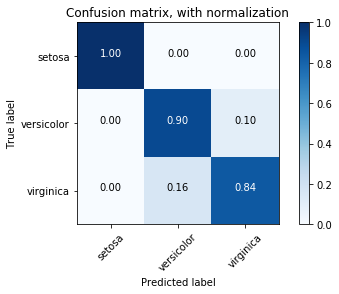

In [931]:
def part1_iris():
    k=5
    
    targetTests,predictions = kNNIris(calcEuclideanDistance)
    report = classification_report(targetTests, predictions)
    print("KNN IRIS Data Euclidean Accuracy:",accuracy_score(targetTests,predictions))
    print(report)
    confMatrix = confusion_matrix(targetTests, predictions)
    #confMatrix = confMatrix.astype('float') / confMatrix.sum(axis=1)[:, np.newaxis]
    #print(confMatrix)
    
    plt.figure()
    plot_confusion_matrix(confMatrix, classes=iris.target_names,
                      title='Confusion matrix, with normalization', normalize=True)
    plt.show()
    

part1_iris()

In [967]:
def part1_leaf():
    k=5
    targetTests,predictions = kNNLeaf(calcEuclideanDistance,k)
    report = classification_report(targetTests, predictions)
    print("KNN LEAF Data Euclidean Accuracy:",accuracy_score(targetTests,predictions))
    print(report)
    """
    confMatrix = confusion_matrix(targetTests, predictions)
    confMatrix = confMatrix.astype('float') / confMatrix.sum(axis=1)[:, np.newaxis]
    print(targetTests,predictions)
    print(confMatrix)
    plt.figure()
    plot_confusion_matrix(confMatrix, classes=[x for x in range(1,16)],
                      title='Confusion matrix, with normalization', normalize=True)
    plt.show()
    """
part1_leaf()

KNN LEAF Data Euclidean Accuracy: 0.12352941176470589
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        12
          2       0.00      0.00      0.00        10
          3       0.00      0.00      0.00        10
          4       0.00      0.00      0.00         8
          5       0.00      0.00      0.00        12
          6       0.20      0.25      0.22         8
          7       0.00      0.00      0.00        10
          8       0.85      1.00      0.92        11
          9       0.00      0.00      0.00        14
         10       0.00      0.00      0.00        13
         11       0.58      0.69      0.63        16
         12       0.00      0.00      0.00        12
         13       0.00      0.00      0.00        13
         14       0.17      0.08      0.11        12
         15       0.00      0.00      0.00        10
         22       0.00      0.00      0.00        12
         23       1.00      0.09      0.17  

/home/hmenn/Workspace/CSE455_MachineLearning_2018/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KNN IRIS Data Manhattan Accuracy: 0.92
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.85      0.92      0.88        50
          2       0.91      0.84      0.87        50

avg / total       0.92      0.92      0.92       150

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.92 0.08]
 [0.   0.16 0.84]]


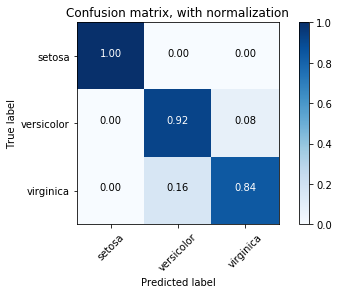

In [968]:
def part2_iris():
    k=5
    
    targetTests,predictions = kNNIris(calcManhattanDistance)
    report = classification_report(targetTests, predictions)
    print("KNN IRIS Data Manhattan Accuracy:",accuracy_score(targetTests,predictions))
    print(report)
    confMatrix = confusion_matrix(targetTests, predictions)
    plt.figure()
    plot_confusion_matrix(confMatrix, classes=iris.target_names,
                      title='Confusion matrix, with normalization', normalize=True)
    plt.show()

part2_iris()

In [976]:
def part2_leaf():
    k=5
    targetTests,predictions = kNNLeaf(calcManhattanDistance,k)
    report = classification_report(targetTests, predictions)
    print("KNN LEAF Data Manhattan Accuracy:",accuracy_score(targetTests,predictions))
    print(report)
    """
    confMatrix = confusion_matrix(targetTests, predictions)
    plt.figure()
    plot_confusion_matrix(confMatrix, classes=[x for x in range(14)],
                      title='Confusion matrix, with normalization', normalize=True)
    plt.show()
    """
part2_leaf()

KNN LEAF Data Manhattan Accuracy: 0.21470588235294116
             precision    recall  f1-score   support

          1       0.05      0.08      0.06        12
          2       0.00      0.00      0.00        10
          3       0.08      0.10      0.09        10
          4       0.00      0.00      0.00         8
          5       0.40      0.17      0.24        12
          6       0.33      0.38      0.35         8
          7       0.00      0.00      0.00        10
          8       1.00      1.00      1.00        11
          9       0.29      0.36      0.32        14
         10       0.17      0.08      0.11        13
         11       0.59      0.62      0.61        16
         12       0.20      0.17      0.18        12
         13       0.25      0.08      0.12        13
         14       0.00      0.00      0.00        12
         15       0.80      0.40      0.53        10
         22       0.00      0.00      0.00        12
         23       1.00      0.36      0.53  

/home/hmenn/Workspace/CSE455_MachineLearning_2018/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [972]:
## DEVELOPER AREA - PLEASE DO NOT TOUCH OR RUN
def developerTests():
    
    # split data, %30->test %70->train
    #irisDataTrain, irisDataTest, irisTargetTrain, irisTargetTest = train_test_split(iris.data, iris.target, test_size=0.3)
    #print(irisTargetTest)
    #trainData = [ list(x) for x in zip(irisDataTrain, irisTargetTrain)]
    #testData = [ list(x) for x in zip(irisDataTest,irisTargetTest)]
    #print(iris.data[0],iris.data[30],iris.data[60],iris.data[90],iris.data[120])

    k=5
    trainData, testData  = kFoldCrossValidation(iris.data, iris.target, k, 0)
    #Print example 1 train data
    print("TrainData[0]:",trainData[0])
    #Print example 1 test data
    print("TestData[0]:",testData[0])
    
    # Test Euclidean Distance
    distance = calcEuclideanDistance(trainData[0][0],testData[0][0])
    print("EuclideanDistance:",distance)
    # Test Manhattan Distance
    distance = calcManhattanDistance(trainData[0][0],testData[0][0])
    print("ManhattanDistance:",distance)
    
    neighboursEuc = getNeighbours(trainData, testData[0][0],5,calcEuclideanDistance)
    print("First Neighbour(Euclidean):",neighboursEuc[0])
    neighboursMan = getNeighbours(trainData, testData[0][0],5,calcManhattanDistance)
    print("First Neighbour(Manhattan):",neighboursMan[0])
        
    ## TEST KNN-5 IrisData - Euclidead Dist
    predictions = []

    for _tdata in testData:
        # get neighbours for all test data
        neighbours = getNeighbours(trainData, _tdata[0],k, calcEuclideanDistance) 
        predictions.append(getMaxOccurancedClass(neighbours))
        
    print("\n->Report for EuclideanDistance KNN:5 on iris data")
    irisTargetTest = [d[1] for d in testData]
    accScore = accuracy_score(irisTargetTest,predictions)
    print(accScore)
    report = classification_report(irisTargetTest,predictions)
    print(report)

    ## TEST KNN-5 IrisData - Manhattan Dist
    k=5
    predictions = []

    for _tdata in testData:
        # get neighbours for all test data
        neighbours = getNeighbours(trainData, _tdata[0],k, calcManhattanDistance) 
        predictions.append(getMaxOccurancedClass(neighbours))
    
    print("\n->Report for ManhattanDistance KNN:5 on iris data")
    accScore = accuracy_score(irisTargetTest,predictions)
    print(accScore)
    report = classification_report(irisTargetTest,predictions)
    print(report)
    
#developerTests()